[]
[232.4433333333333, 240.54999999999998, 237.98666666666668, 235.11666666666665, 259.99666666666667, 256.9866666666666, 204.98666666666668, 219.58, 236.92333333333332, 217.34333333333333, 218.1933333333333, 199.74666666666667, 266.93333333333334, 240.05249999999998, 211.525, 259.14, 220.42000000000002, 251.52, 218.445, 261.58, 242.67, 199.605, 231.15666666666667, 216.95666666666662]


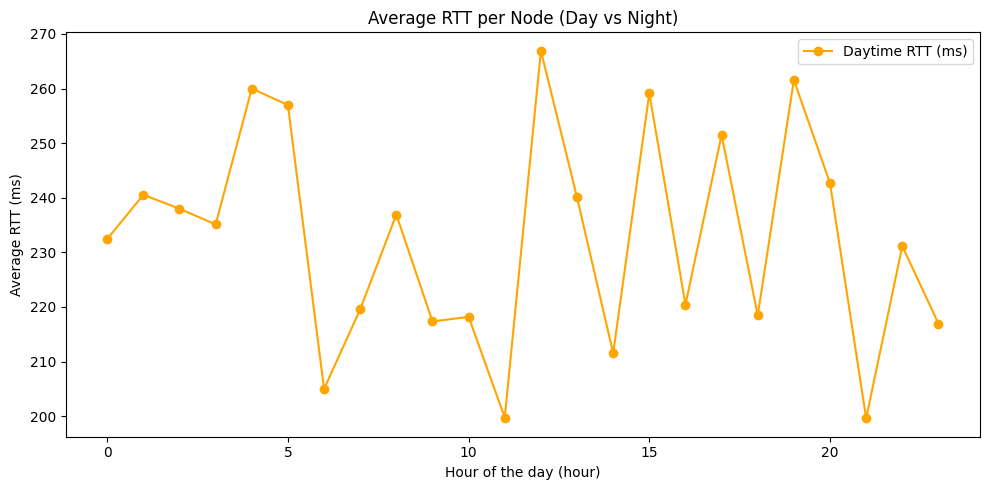

In [ ]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

# ====== 文件路径 ======
FILE_NAME = "reports.json"

# ====== 加载数据 ======
with open(FILE_NAME, "r") as f:
    data = json.load(f)

hours=[i for i in range(24)]
# { hour: (avg_rtt, n)}
# ex: {2: (110, 15)}
avg_rtt_total={}

n=0
for report_entry in data:
    for timestamp, report_data in report_entry.items():

        ts_formatted = timestamp.replace('_', ' ').replace('h', ':')
        dt = datetime.strptime(ts_formatted, "%Y-%m-%d %H:%M")
        
        routers = report_data["report"]["hubs"]
        last = len(routers)-1 if routers[-1]["host"] != "???" else len(routers)-2
        dest = routers[last]

        avg = dest.get("Avg")
        hour = dt.hour
        
        if isinstance(avg, (int, float)):
            if hour in avg_rtt_total:
                old_rtt, old_n=avg_rtt_total[hour]
                avg_rtt_total[hour]=(old_rtt+avg, old_n+1)
            else:
                avg_rtt_total[hour]=(avg, 1)

avg_rtt=[]
print(avg_rtt)
for hour in range(24):
    # Remets dans le bon ordre (de minuit à 23h)
    if hour in avg_rtt_total:
        rtt, n=avg_rtt_total[hour]
        avg_rtt.append(rtt/n)
    else:
        continue

print(avg_rtt)

plt.figure(figsize=(10, 5))
plt.plot(hours, avg_rtt, marker='o', label='Average RTT (ms)', color='orange')
plt.xlabel("Hour of the day (hour)")
plt.ylabel("Average RTT (ms)")
plt.title("")
plt.legend()
plt.tight_layout()
plt.show()
